# Model parameters 

In [34]:
setwd("/Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model/")
paste("Working dir: ", getwd())
rm(list=ls())

[1] "Working dir:  /Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model"

In [35]:
install.packages("pacman")
pacman::p_load(fields, AtmRay, maptools, raster, plot3D, rhdf5, scatterplot3d, akima, rgl, gtools, sp, ggplot2, 
               phylin, geoR, xts, signal, formatR) 


The downloaded binary packages are in
	/var/folders/b_/kpbcrn3s4_1770_6k278969jd__sdl/T//Rtmpe9El9m/downloaded_packages


## I/O files

In [36]:
data_dir = "~/Dropbox/PNNL/Projects/Reach_scale_model/data/"


# geoframework data
fname_hanford = paste(data_dir, "geoFramework/hanford.asc", sep = "")
fname_basalt= paste(data_dir, "geoFramework/top_of_basalt.asc", sep = "")
fname_ringold_a= paste(data_dir, "geoFramework/ringold_a.asc", sep = "")
fname_ringold_e= paste(data_dir, "geoFramework/ringold_e.asc", sep = "")
fname_ringold_lm= paste(data_dir, "geoFramework/ringold_lm.asc", sep = "")
fname_cold_creek= paste(data_dir, "geoFramework/cold_creek.asc", sep = "")
fname_taylor_flats= paste(data_dir, "geoFramework/taylor_flats.asc", sep = "")
fname_river_bath = paste(data_dir, "geoFramework/river_bathymetry_20m.asc", sep = "")

# mass1 data
fname_mass1_coord = paste(data_dir, "MASS1/coordinates.csv", sep = "")
fname_mass1_pts = paste(data_dir, "MASS1/transient_1976_2016/", sep = "")
fname_mass.info = paste(data_dir, "MASS1/mass_info.csv", sep = "") 
# well data
fname_mvAwln = paste(data_dir, "well_data/mvAwln.csv", sep = "")
fname_mvAwln_id = paste(data_dir, "well_data/mvAwln_wellID_updated.csv", sep = "")
fname_manual_wells_ids = paste(data_dir, "well_data/HYDRAULIC_HEAD_MV_WellID.csv", sep = "")
fname_manual_wells = paste(data_dir, "well_data/HYDRAULIC_HEAD_MV.csv", sep = "")
fname_USGS_wells = paste(data_dir, "well_data/Burns_well_data.csv", sep = "")
fname_USGS_wells_ids = paste(data_dir, "well_data/Burns_well_attributes.csv", sep = "")
fname_SFA_wells = paste(data_dir, "well_data/300A_Well_Data/", sep = "")
fname_SFA_wells_ids = paste(data_dir, "well_data/300A_well_coord.csv", sep = "")
fname_SFA_wells_all = paste(data_dir, "well_data/SFA_all_wells.csv", sep = "")

#river geometry
fname_river.geo = paste(data_dir, "river_geometry_manual.csv", sep = "")

# # if statement
# is.plot = T
# is.smooth = T

imodel=c("100x100x1_6h_bc")
figure_dir = "~/Dropbox/PNNL/Projects/Reach_scale_model/figures/"
## ------------------------output figures
fig.basalt2d = paste(figure_dir, "basalt2d.jpg",sep = "")
fig.hanford2d = paste(figure_dir, "hanford2d.jpg",sep = "")
fig.basalt2d.model = paste(figure_dir, "basalt2d_model_", imodel, ".jpg", sep = "")
fig.hanford2d.model = paste(figure_dir, "hanford2d_model_", imodel, ".jpg", sep = "")
fig.ringold_a_2d = paste(figure_dir, "ringold_a_2d.jpg",sep = "")
fig.ringold_a_2d.model = paste(figure_dir, "ringold_a_2d_model_", imodel, ".jpg", sep = "")
fig.ringold_e_2d = paste(figure_dir, "ringold_e_2d.jpg",sep = "")
fig.ringold_e_2d.model = paste(figure_dir, "ringold_e_2d_model_", imodel, ".jpg", sep = "")
fig.ringold_lm_2d = paste(figure_dir, "ringold_lm_2d.jpg",sep = "")
fig.ringold_lm_2d.model = paste(figure_dir, "ringold_lm_model_", imodel, ".jpg", sep = "")
fig.cold_creek_2d = paste(figure_dir, "cold_creek_2d.jpg",sep = "")
fig.cold_creek_2d.model = paste(figure_dir, "creek_2d_model_", imodel, ".jpg", sep = "")
fig.taylor_flats_2d = paste(figure_dir, "taylor_flats_2d.jpg",sep = "")
fig.taylor_flats_2d.model = paste(figure_dir, "taylor_flats_2d_model_", imodel, ".jpg", sep = "")
fig.river_bath_2d = paste(figure_dir, "river_bath_2d.jpg",sep = "")
fig.river_bath_2d.model = paste(figure_dir, "river_bath_2d_model_", imodel, ".jpg", sep = "")
fig.surface3d=paste(figure_dir, "surface_cell_3d_", imodel, ".jpg", sep = "")
fig.surface2d=paste(figure_dir, "surface_cell_2d_", imodel, ".jpg", sep = "")
fig.grids = paste(figure_dir, "grids_", imodel, ".jpg", sep = "")
fig.river.mass1 = paste(figure_dir, "river.mass1_", imodel, ".jpg", sep = "")
# fig.initialH_idw = paste(figure_dir, "initial_head_", imodel, ".jpg", sep = "")
fig_initial_H = paste(figure_dir, "initial_head_",imodel, ".jpg", sep = "")

result_dir = "~/Dropbox/PNNL/Projects/Reach_scale_model/results/"

##----------------------- R object files
fname_geoFramework.r = paste(result_dir, "HFR_model_", imodel, "/geoframework.r", sep = "")
fname_ascii.r = paste(result_dir, "ascii.r", sep = "")
fname_model_inputs.r = paste(result_dir, "HFR_model_", imodel, "/model_inputs.r", sep = "")
fname_material_r= paste(result_dir, "HFR_model_", imodel, "/HFR_material.r", sep = "")
fname_wells.r = paste(result_dir, "well_compiled_wl_data.r", sep = "")
# fname.selected.wells.df = "results/selected.wells.df_2007-01-01.r"
fname_mass1_xts = paste(result_dir, "mass.data.xts.r", sep = "")
fname_mass1_data.r = paste(result_dir, "mass.data.r", sep = "")

fname_mass_section = paste(result_dir, "HFR_model_", imodel, "/mass_section.txt", sep = "")
fname_selected_wells_csv = paste(result_dir, "selected_wells_010107_3m.csv", sep = "")
fname_selected_wells_unique_csv = paste(result_dir, "selected_wells_unique_010107_3m.csv", sep = "")

input_dir = "~/Dropbox/PNNL/Projects/Reach_scale_model/Inputs/"

##----------------------- PFLOTRAN input files
fname_material_h5 = paste(input_dir, "HFR_model_", imodel, "/HFR_material_river.h5", sep = "")
fname_initial.h5 = paste(input_dir, "HFR_model_", imodel, "/HFR_H_Initial.h5", sep = "")
fname.BC.h5 = paste(input_dir, "HFR_model_", imodel, "/HFR_H_BC.h5", sep = "")
fname_DatumH = paste(input_dir, "river_bc/bc_1w_smooth/DatumH_Mass1_")
fname_Gradients = paste(input_dir, "river_bc/bc_1w_smooth/Gradients_Mass1_")
fname_pflotran.in = paste(input_dir, "HFR_model_", imodel, "/pflotran_", imodel, ".in", sep = "")


# # input deck names
# fname_material.h5.in = c("HFR_material_river.h5")
# fname_H.initial.h5.in = c("HFR_H_Initial.h5")
# fname_bc_dir = "bc_6h_smooth/"
# fname.DatumH.in = c("DatumH_Mass1_")
# fname.Gradient.in = c("Gradients_Mass1_")

## functions

In [37]:
proj_to_model <- function(origin,angle,coord)
{
  output = array(NA,dim(coord))
  rownames(output) = rownames(coord)
  colnames(output) = colnames(coord)    
  output[,1] = (coord[,1]-origin[1])*cos(angle)+(coord[,2]-origin[2])*sin(angle)
  output[,2] = (coord[,2]-origin[2])*cos(angle)-(coord[,1]-origin[1])*sin(angle)
  return(output)
}   


model_to_proj <- function(origin,angle,coord)
{
  output = array(NA,dim(coord))
  rownames(output) = rownames(coord)
  colnames(output) = colnames(coord)    
  output[,1] = origin[1]+coord[,1]*cos(angle)-coord[,2]*sin(angle)
  output[,2] = origin[2]+coord[,1]*sin(angle)+coord[,2]*cos(angle)
  return(output)
}   

## model dimensions

In [38]:
#grid cell size
idx = 100
idy = 100
idz = 1

In [39]:
# rotating angle of model
angle = 0

#hanford reach
# model_origin = c(538000, 97000)
model_origin = c(551600, 104500)

xlen = 60*1000 #x boundary length
ylen = 60*1000 #y boundary length

zlen = 100 #z boundary length
# zlen = 100 #z boundary length

# model origin
z0 = 50  # relative to sea level 
x0 = model_origin[1]
y0 = model_origin[2]

In [40]:
dx = rep(idx, xlen/idx)
dy = rep(idy, ylen/idy)
dz = rep(idz, zlen/idz)

nx = length(dx)
ny = length(dy)
nz = length(dz)

#create x,y,z coordinates for each cell center
x = cumsum(dx)-0.5*dx
y = cumsum(dy)-0.5*dy
z = z0 + cumsum(dz)-0.5*dz

#min and max x,y,z coord
range_x = c(x[1]-0.5*dx[1], x[length(x)]+0.5*dx[length(x)])
range_y = c(y[1]-0.5*dy[1], y[length(y)]+0.5*dy[length(y)])
range_z = c(z[1]-0.5*dz[1], z[length(z)]+0.5*dz[length(z)])

##dimension of model domain in CRS
west_x = x0
east_x = x0 + xlen
south_y = y0
north_y = y0 + ylen

# interpolate model coordinates 
cells_model = expand.grid(x,y) # expand grid to include all x-y coordinates
cells_proj = model_to_proj(model_origin,angle,cells_model) # convert model coord. to proj. coord.

unit_x = sort(as.numeric(names(table(cells_proj[, 1]))))
unit_y = sort(as.numeric(names(table(cells_proj[, 2]))))

In [41]:
save(list = c("idx", "idy", "idz", "angle", "model_origin", "xlen", "ylen", "zlen", "x0", "y0", "z0", 
             "dx", "dy", "dz", "nx", "ny", "nz", "x", "y", "z", "range_x", "range_y", "range_z", 
             "west_x", "east_x", "south_y", "north_y", "cells_model", "cells_proj","unit_x", "unit_y"), 
     file = fname_model_inputs.r)
print(paste("model inputs is save in ", fname_model_inputs.r, sep=""))

[1] "model inputs is save in ~/Dropbox/PNNL/Projects/Reach_scale_model/results/HFR_model_100x100x1_6h_bc/model_inputs.r"


# import geologic unit and interpolate to model domain

## import model configuration data

In [10]:
# attach(fname_model_inputs.r, pos = 2)
load(fname_model_inputs.r)

The following objects are masked _by_ .GlobalEnv:

    fname_model_inputs.r, imodel



## load ASCII files and interpolate to model domain

In [ ]:
# import ASCII files 
hanford_data = readAsciiGrid(fname_hanford, as.image = T)
basalt_data = readAsciiGrid(fname_basalt, as.image = T)
cold_creek_data = readAsciiGrid(fname_cold_creek, as.image = T)
taylor_flats_data = readAsciiGrid(fname_taylor_flats, as.image = T)
ringold_e_data = readAsciiGrid(fname_ringold_e, as.image = T)
ringold_lm_data = readAsciiGrid(fname_ringold_lm, as.image = T)
ringold_a_data = readAsciiGrid(fname_ringold_a, as.image = T)
river_bath_data = readAsciiGrid(fname_river_bath, as.image = T)

save(list = c("hanford_data", "basalt_data", "cold_creek_data", "taylor_flats_data", "ringold_e_data", "ringold_lm_data", "ringold_a_data", "river_bath_data"), file = fname_ascii.r)

** `attach()` is a safety wrapper for `load()`, and it attached R object to search path. To see all attached variables, use `ls(pos = 2)`; to detach, use `detach(pos = 2)`.**

In [49]:
attach(fname_ascii.r) ## load into stored geologic data  

The following objects are masked from file:~/Dropbox/PNNL/Projects/Reach_scale_model/results/ascii.r (pos = 25):

    basalt_data, cold_creek_data, hanford_data, ringold_a_data,
    ringold_e_data, ringold_lm_data, river_bath_data, taylor_flats_data



## Interpolate geologic framework over model domain

In [20]:
# map surface to model grids
cells_hanford = interp.surface(hanford_data, cells_proj) 
cells_basalt = interp.surface(basalt_data, cells_proj) 
cells_cold_creek = interp.surface(cold_creek_data, cells_proj)
cells_taylor_flats = interp.surface(taylor_flats_data, cells_proj)
cells_ringold_e = interp.surface(ringold_e_data, cells_proj)
cells_ringold_lm = interp.surface(ringold_lm_data, cells_proj)
cells_ringold_a = interp.surface(ringold_a_data, cells_proj)
cells_river_bath = interp.surface(river_bath_data, cells_proj)
# create surface arrays
cells_hanford = array(cells_hanford, c(nx, ny))
cells_basalt = array(cells_basalt, c(nx, ny))
cells_cold_creek = array(cells_cold_creek, c(nx, ny))
cells_taylor_flats = array(cells_taylor_flats, c(nx, ny))
cells_ringold_e = array(cells_ringold_e, c(nx, ny))
cells_ringold_lm = array(cells_ringold_lm, c(nx, ny))
cells_ringold_a = array(cells_ringold_a, c(nx, ny))
cells_river_bath = array(cells_river_bath, c(nx, ny))

In [21]:
save(list=c("cells_hanford", "cells_basalt", "cells_cold_creek", "cells_taylor_flats", "cells_ringold_e",
            "cells_ringold_lm", "cells_ringold_a", "cells_river_bath"), file=fname_geoFramework.r)

## plot each geologic layer

In [4]:
attach(fname_geoFramework.r)

### plot hanford

In [ ]:
#---------------------------- plot hanford ------------------------- 
# crop dataset to model region
x_model = which(hanford_data$x >= west_x & hanford_data$x <= east_x)
y_model = which(hanford_data$y >= south_y & hanford_data$y <= north_y)

hanford_data_model = list()
hanford_data_model = list(x = hanford_data$x[x_model], y = hanford_data$y[y_model], z = hanford_data$z[x_model, y_model])

** plot raw hanford layer**

quartz_off_screen 
                3

pdf 
  2

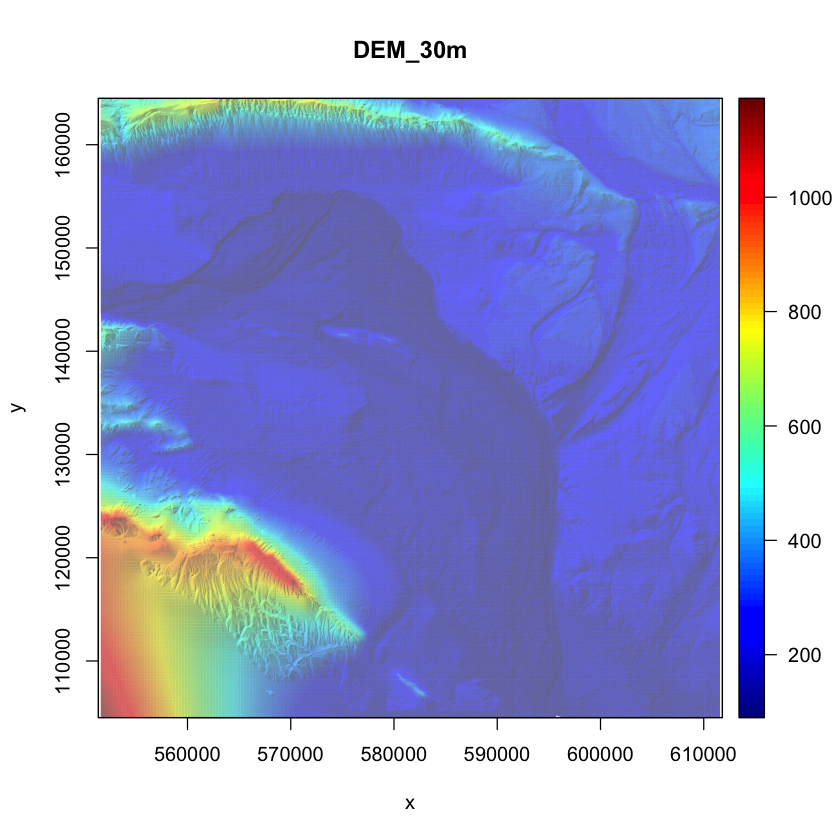

In [23]:
# jpeg(fname_fig.hanford2d, width=8,height=8,units='in',res=300,quality=100)
image2D(hanford_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("DEM_30m"), asp = 1)
dev.copy(jpeg, width=8,height=8,units='in',res=300,quality=100, file = fname_fig.hanford2d)
dev.off()

** plot hanford layer in model resolution **

quartz_off_screen 
                3

pdf 
  2

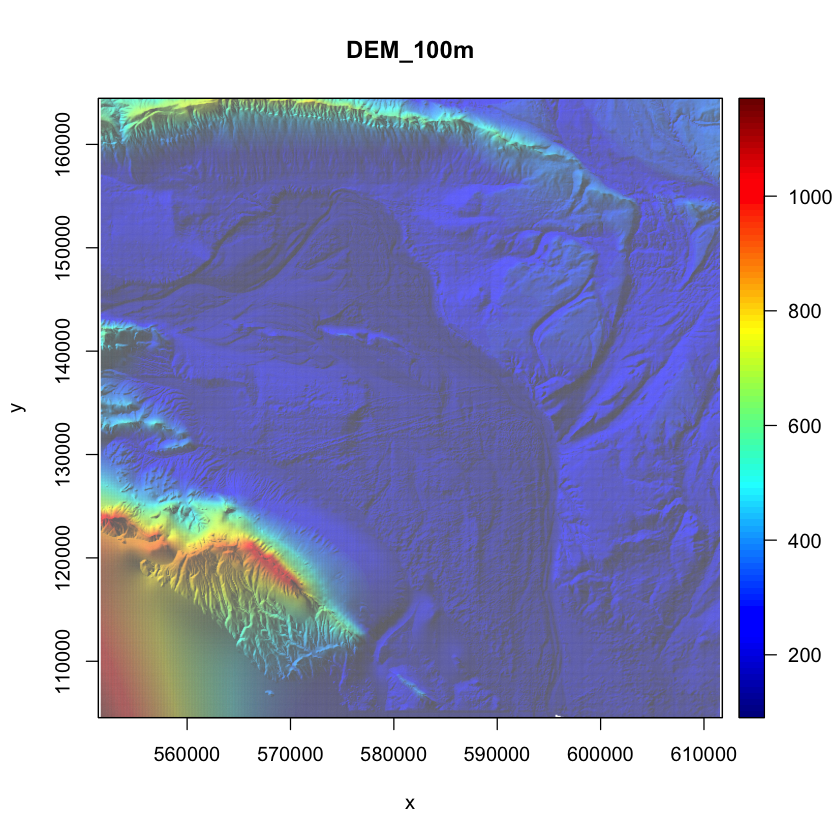

In [14]:
#jpeg(fname_fig.hanford2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_hanford, x= unit_x, y= unit_y, shade=0.5, rasterImage = F, NAcol = "white", border = NA, resfac = 3,
        main = paste("DEM_", idx,"m", sep = ""), asp = 1)
dev.copy(jpeg, width=8,height=8,units='in',res=300,quality=100, file = fig.hanford2d.model)
dev.off()

In [ ]:
## show the perspective view of the surface plot
# open3d()
# bg3d("white")
# nbcol = 100
# color = rev(rainbow(nbcol, start = 0/6, end = 4/6))
# zcol  = cut(hanford_data_model$z, nbcol)
# persp3d(hanford_data_model$x, hanford_data_model$y, hanford_data_model$z, col = color[zcol], aspect = c(1,1,0.2))
# 

### plot basalt

In [ ]:
##---------------------------- plot basalt ------------------------- 
## crop dataset to model region
x_model = which(basalt_data$x >= west_x & basalt_data$x <= east_x)
y_model = which(basalt_data$y >= south_y & basalt_data$y <= north_y)

basalt_data_model = list()
basalt_data_model = list(x = basalt_data$x[x_model], y = basalt_data$y[y_model], z = basalt_data$z[x_model, y_model])

#jpeg(fname_fig.basalt2d, width=8,height=8,units='in',res=300,quality=100)
image2D(basalt_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("basalt_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.basalt2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_basalt, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("basalt_", idx,"m", sep = ""), asp = 1)
#dev.off()

In [ ]:
##---------------------------- plot ringold ------------------------- 
## crop dataset to model region
x_model = which(ringold_a_data$x >= west_x & ringold_a_data$x <= east_x)
y_model = which(ringold_a_data$y >= south_y & ringold_a_data$y <= north_y)

ringold_a_data_model = list()
ringold_a_data_model = list(x = ringold_a_data$x[x_model], y = ringold_a_data$y[y_model], z = ringold_a_data$z[x_model, y_model])

#jpeg(fname_fig.ringold_a_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(ringold_a_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("ringold_a_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.ringold_a_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_ringold_a, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("ringold_a_", idx,"m", sep = ""), asp = 1)
#dev.off()

##
x_model = which(ringold_e_data$x >= west_x & ringold_e_data$x <= east_x)
y_model = which(ringold_e_data$y >= south_y & ringold_e_data$y <= north_y)

ringold_e_data_model = list()
ringold_e_data_model = list(x = ringold_e_data$x[x_model], y = ringold_e_data$y[y_model], z = ringold_e_data$z[x_model, y_model])

#jpeg(fname_fig.ringold_e_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(ringold_e_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("ringold_e_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.ringold_e_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_ringold_e, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("ringold_e_", idx,"m", sep = ""), asp = 1)
#dev.off()

##
x_model = which(ringold_lm_data$x >= west_x & ringold_lm_data$x <= east_x)
y_model = which(ringold_lm_data$y >= south_y & ringold_lm_data$y <= north_y)

ringold_lm_data_model = list()
ringold_lm_data_model = list(x = ringold_lm_data$x[x_model], y = ringold_lm_data$y[y_model], z = ringold_lm_data$z[x_model, y_model])

#jpeg(fname_fig.ringold_lm_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(ringold_lm_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("ringold_lm_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.ringold_lm_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_ringold_lm, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("ringold_lm_", idx,"m", sep = ""), asp = 1)
#dev.off()

In [ ]:
##---------------------------- plot cold creek ------------------------- 
x_model = which(cold_creek_data$x >= west_x & cold_creek_data$x <= east_x)
y_model = which(cold_creek_data$y >= south_y & cold_creek_data$y <= north_y)

cold_creek_data_model = list()
cold_creek_data_model = list(x = cold_creek_data$x[x_model], y = cold_creek_data$y[y_model], z = cold_creek_data$z[x_model, y_model])

#jpeg(fname_fig.cold_creek_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(cold_creek_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("cold_creek_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.cold_creek_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_cold_creek, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("cold_creek_", idx,"m", sep = ""), asp = 1)
#dev.off()

In [ ]:
##---------------------------- plot taylor flats ------------------------- 
x_model = which(taylor_flats_data$x >= west_x & taylor_flats_data$x <= east_x)
y_model = which(taylor_flats_data$y >= south_y & taylor_flats_data$y <= north_y)

taylor_flats_data_model = list()
taylor_flats_data_model = list(x = taylor_flats_data$x[x_model], y = taylor_flats_data$y[y_model], z = taylor_flats_data$z[x_model, y_model])

#jpeg(fname_fig.taylor_flats_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(taylor_flats_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("taylor_flats_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.taylor_flats_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_taylor_flats, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("taylor_flats", idx,"m", sep = ""), asp = 1)
#dev.off()

### plot river bathymetry

In [26]:
##---------------------------- plot river bathymetry ------------------------- 
x_model = which(river_bath_data$x >= west_x & river_bath_data$x <= east_x)
y_model = which(river_bath_data$y >= south_y & river_bath_data$y <= north_y)

river_bath_data_model = list()
river_bath_data_model = list(x = river_bath_data$x[x_model], y = river_bath_data$y[y_model], z = river_bath_data$z[x_model, y_model])

quartz_off_screen 
                3

pdf 
  2

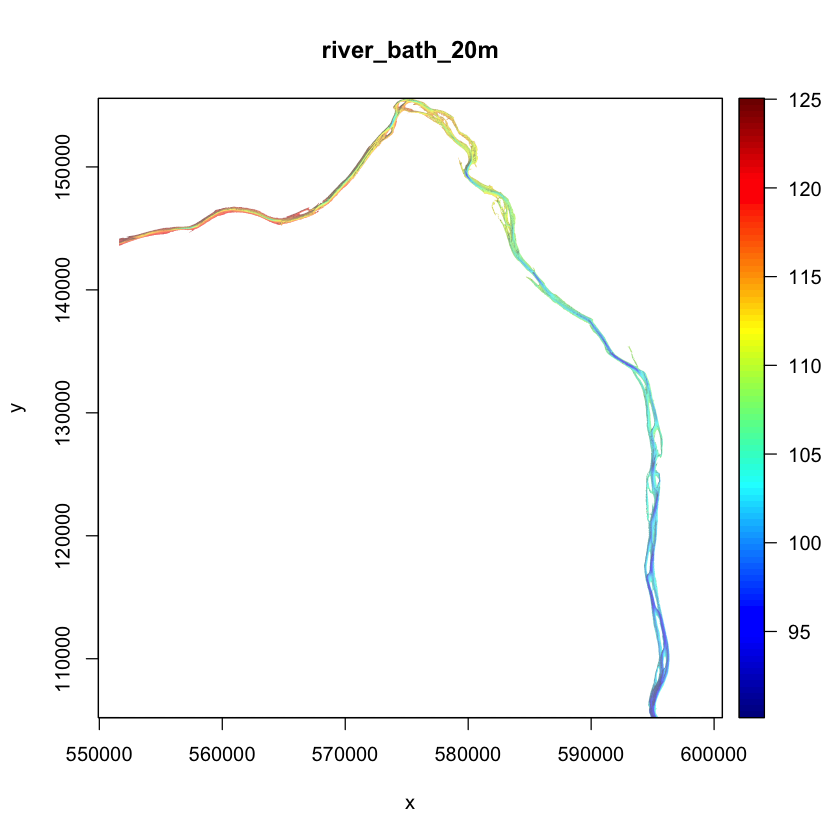

In [27]:
#jpeg(fname_fig.river_bath_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(river_bath_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("river_bath_20m"), asp = 1)
dev.copy(jpeg, width=8,height=8,units='in',res=300,quality=100, file = fname_fig.river_bath_2d)
dev.off()

quartz_off_screen 
                3

pdf 
  2

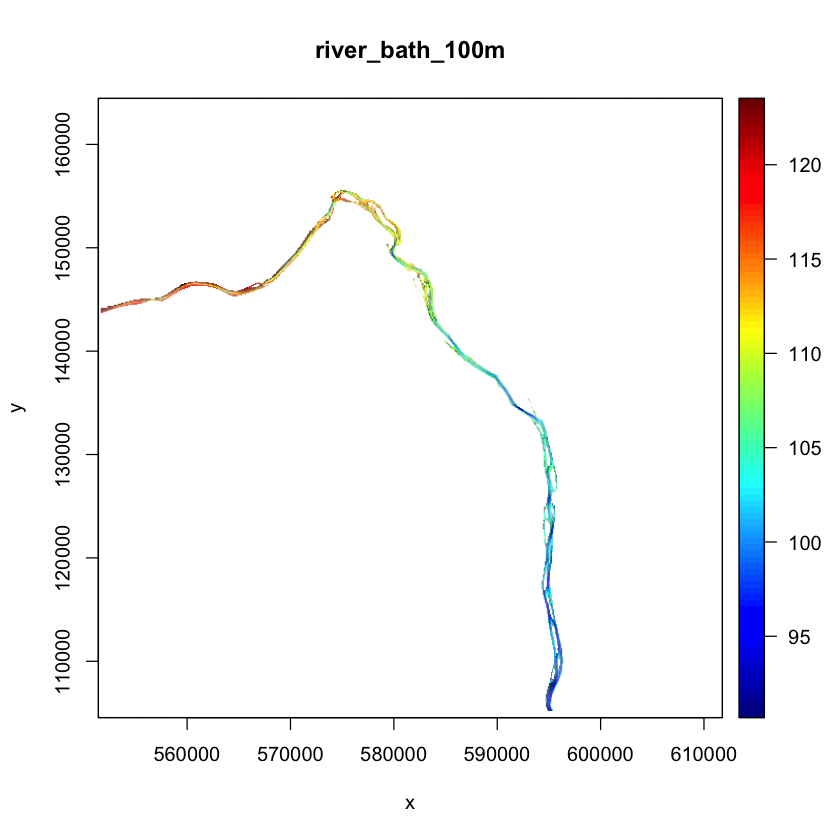

In [16]:
#jpeg(fname_fig.river_bath_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_river_bath, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("river_bath_", idx,"m", sep = ""), asp = 1)
dev.copy(jpeg, width=8,height=8,units='in',res=300,quality=100, file = fig.river_bath_2d.model)
dev.off()

# Generate material id, river sections for PFLOTRAN

In [8]:
load(fname_model_inputs.r)

attach(fname_geoFramework.r)  ## load into geologic layer from geoFramework

## initialize material/cell ids 

In [22]:
material.ids = array(NA, c(nx,ny,nz)) #assign ID=0 for all cells=nx*ny*nz

cell.ids = array(seq(1,nx*ny*nz),c(nx,ny,nz))
cell.ids.z = (cell.ids-1)%/%(nx*ny)
cell.ids.y = (cell.ids-1-nx*ny*cell.ids.z)%/%nx
cell.ids.x = cell.ids-1-nx*cell.ids.y-nx*ny*cell.ids.z
cell.ids.x = cell.ids.x+1
cell.ids.y = cell.ids.y+1
cell.ids.z = cell.ids.z+1

## Assign material ids to cells above (0) and below (1) hanford surface.

In [23]:
for (iz in 1:nz)
{
    # material.ids[,,iz][which(cells_basalt<=z[iz])] = 1  #cells_HR: HR contact, assign id=1 to Hanford for regions above HR contact     

    material.ids[,,iz][which(cells_hanford >= z[iz])] = 1  #assign id=1 to cells below hanford surface
    material.ids[,,iz][which(cells_hanford < z[iz])] = 0  #assign id=0 to cells above hanford surface
    
    # material.ids[,,iz][which(cells_hanford == NA)] = NA 
}

In [24]:
face.ids = array(rep(0,nx*ny*nz),c(nx,ny,nz)) #assign initial face id=0, total six different faces
face.ids.final = vector()
face.cell.ids.final = vector()

## search for cell/face ids for top surface

In [25]:
##-----------------------------search for the faces ajacent to atmosphere (ID=0)------------------------------------##
#xdirection
if (nx>1) {
diff.material.ids = apply(material.ids, c(2,3), diff) #subtract face#2 with face#1, see "apply" function

# #if the diff=4, 4-0=4, i.e. ringold contact with river,and river is on the LEFT side of the cell
# if (any(diff.material.ids==4)) {
#     face.ids[ which(diff.material.ids==4, arr.ind=TRUE)+
#                  t(replicate(dim(which(diff.material.ids==4, arr.ind=TRUE))[1],
#                              c(1,0,0)))
#              ] = 1
# }

#if the diff=1, 1-0=1, i.e. hanford contact with river, and river is on the LEFT side of the cell, so the face# contact the river would be "1"
    if (any(diff.material.ids==1)) {
        face.ids[ which(diff.material.ids==1,arr.ind=TRUE)+
                     t(replicate(dim(which(diff.material.ids==1,arr.ind=TRUE))[1],
                                 c(1,0,0)))
                 ] = 1
    }

face.ids.final = c(face.ids.final, face.ids[face.ids==1])
face.cell.ids.final = c(face.cell.ids.final, cell.ids[face.ids==1])


# face.ids[which(diff.material.ids == -4, arr.ind=TRUE)] = 2 # if diff=-4 or -1, then river is on the Right hand side of the cell, so the face# contact the river would be "2"
face.ids[which(diff.material.ids == -1, arr.ind=TRUE)] = 2

face.ids.final = c(face.ids.final,face.ids[face.ids==2])
face.cell.ids.final = c(face.cell.ids.final,cell.ids[face.ids==2])


}

In [ ]:
#ydirection
if(ny>1) {
diff.material.ids = aperm(apply(material.ids, c(1,3), diff), c(2,1,3))

# # if diff = 1 or 4, means river on the front side, and face# contact river would be 3
# if (any(diff.material.ids==4)) {
#     face.ids[which(diff.material.ids==4,arr.ind=TRUE)+
#                  t(replicate(dim(which(diff.material.ids==4,arr.ind=TRUE))[1],
#                              c(0,1,0)))
#              ] = 3
# }

if (any(diff.material.ids==1)) {
    face.ids[which(diff.material.ids==1,arr.ind=TRUE)+
                 t(replicate(dim(which(diff.material.ids==1,arr.ind=TRUE))[1],
                             c(0,1,0)))
             ] = 3
}


face.ids.final = c(face.ids.final, face.ids[face.ids==3])
face.cell.ids.final = c(face.cell.ids.final, cell.ids[face.ids==3])

# if diff = -1 or -4, means river on the front side, and face# contact river would be 4
# face.ids[which(diff.material.ids==-4,arr.ind=TRUE)] = 4
face.ids[which(diff.material.ids == -1, arr.ind=TRUE)] = 4


face.ids.final = c(face.ids.final,face.ids[face.ids==4])
face.cell.ids.final = c(face.cell.ids.final,cell.ids[face.ids==4])


}

In [26]:
#zdirection
if(nz>1){
diff.material.ids = aperm(apply(material.ids, c(1,2), diff), c(2,3,1))

### if diff = 1 or 4, means river on the bottom side, and face# contact river would be 5
# if (any(diff.material.ids==4)) {
# 
#     face.ids[which(diff.material.ids==4,arr.ind=TRUE)+
#                  t(replicate(dim(which(diff.material.ids==4,arr.ind=TRUE))[1],
#                              c(0,0,1)))
#              ] = 5
# }


if (any(diff.material.ids == 1, na.rm = TRUE)) {
    face.ids[which(diff.material.ids==1,arr.ind=TRUE)+
                 t(replicate(dim(which(diff.material.ids==1,arr.ind=TRUE))[1],
                             c(0,0,1)))
             ] = 5
}

face.ids.final = c(face.ids.final,face.ids[face.ids==5])
face.cell.ids.final = c(face.cell.ids.final,cell.ids[face.ids==5])

# if diff = -1 or -4, means river on the top side, and face# contact river would be 6
# face.ids[which(diff.material.ids==-4,arr.ind=TRUE)] = 6
face.ids[which(diff.material.ids==-1,arr.ind=TRUE)] = 6

face.ids.final = c(face.ids.final,face.ids[face.ids==6])
face.cell.ids.final = c(face.cell.ids.final,cell.ids[face.ids==6])

}

In [ ]:
face.ids.final = as.integer(face.ids.final)
face.cell.ids.final = as.integer(face.cell.ids.final)

face.ids.final = face.ids.final[order(face.cell.ids.final)]
face.cell.ids.final = sort(face.cell.ids.final)

## assign material ids to different layers

** need to put this section after face cell searches so that material id does not have number more than 0 and 1 **

In [27]:
##------------------------------assign ID=0, 2, 3, ... to domain b/w hanford and basalt---------------------------------------## 

for (iz in 1:nz)
{
  material.ids[,,iz][which(z[iz]<cells_cold_creek)] = 2 # assign ID=2 for cold_creek
  material.ids[,,iz][which(z[iz]<cells_taylor_flats)] = 3 # assign ID=3 for taylor_flats
  material.ids[,,iz][which(z[iz]<cells_ringold_e)] = 4 # assign ID=4 for ringold_e
  material.ids[,,iz][which(z[iz]<cells_ringold_lm)] = 5 # assign ID=5 for ringold_lm
  material.ids[,,iz][which(z[iz]<cells_ringold_a)] = 6 # assign ID=6 for ringold_a
  
#   material.ids[,,iz][which(z[iz]<cells_basalt)] = 9 # assign ID=9 for basalt
  material.ids[,,iz][which(z[iz]<cells_basalt)] = 0 # basalt is inactive
}

## replace material id=NA with 0
material.ids[is.na(material.ids)] = 0

## plot top surface with inactive cells (gray)

In [28]:
## plot surface-3D
face.cell.ids.final.unique = unique(face.cell.ids.final)
# surface.x = x[cell.ids.x[face.cell.ids.final.unique]]
# surface.y = y[cell.ids.y[face.cell.ids.final.unique]]
# surface.z = z[cell.ids.z[face.cell.ids.final.unique]]
surface.x = x[cell.ids.x[face.cell.ids.final]]
surface.y = y[cell.ids.y[face.cell.ids.final]]
surface.z = z[cell.ids.z[face.cell.ids.final]]

# s = interp(surface.x, surface.y, surface.z)
# s = interp(surface.x, surface.y, surface.z)
# surface3d(s$x,s$y,s$z,color="blue")

## show the perspective view of the surface plot
# open3d()
# bg3d("white")
# nbcol = 100
# color = rev(rainbow(nbcol, start = 0/6, end = 4/6))
# zcol  = cut(s$z, nbcol)
# persp3d(s$x,s$y,s$z, col = color[zcol], aspect = c(1,1,0.2))

# jpeg(fname_fig.surface2d, width=8,height=8,units='in',res=300,quality=100)
# image2D(s, shade=0.2, rasterImage = F, NAcol = "gray",
#         main = c("surface cells"), asp = 1)
# dev.off()

## find river cells within river geometry

In [29]:
##-------------------------------find river cells within river geometry---------------------------------------##

## read into river geometry

river.geometry = read.csv(fname_river.geo)

river.geometry = river.geometry[, 2:3]

river.geometry.model = proj_to_model(model_origin, angle, river.geometry)
# colnames(river.geometry.model) = c("x", "y")

## look for cells inside river geometry
pts_in_poly = point.in.polygon(point.x = surface.x, point.y= surface.y, pol.x = river.geometry.model[, 1], pol.y = river.geometry.model[, 2])

river.x = surface.x[which(pts_in_poly==1)]
river.y = surface.y[which(pts_in_poly==1)]

quartz_off_screen 
                3

pdf 
  2

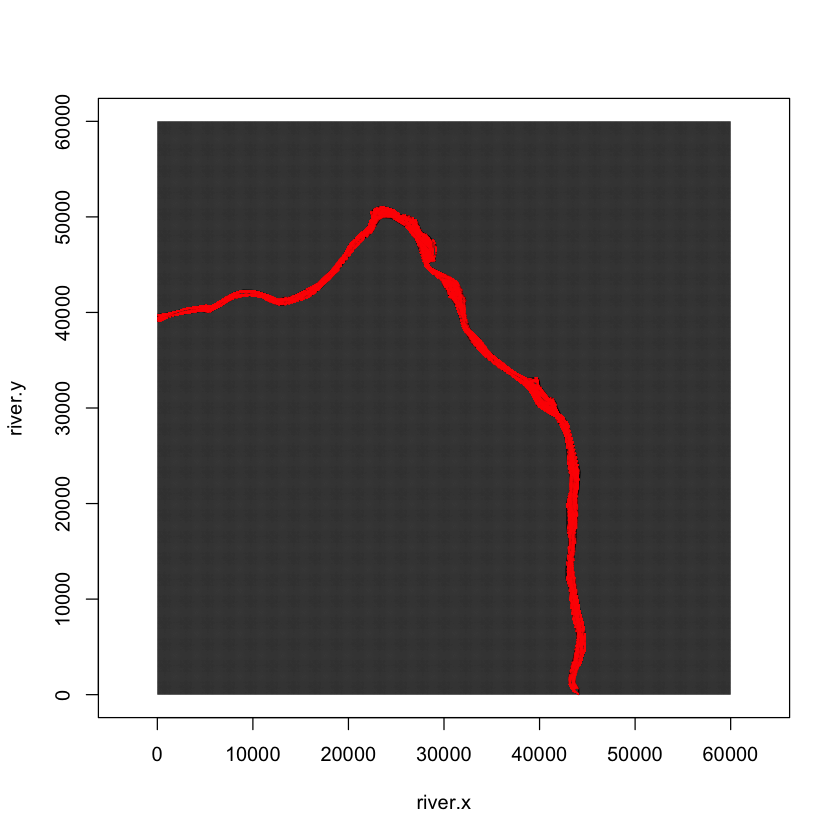

In [19]:
# jpeg(fname_fig.grids, width=10,height=10,units='in',res=300,quality=100)
plot(river.x, river.y, xlim = c(0, xlen), ylim = c(0, ylen), asp = 1, col = "red", pch = 20, cex=0.05)
polygon(river.geometry.model[, 1], river.geometry.model[, 2], border = "black")
points(cells_model, pch = 20, cex=0.05)
points(river.x, river.y, col = "red", pch = 20, cex=0.05)

# grid(nx, ny, lty = "solid")
dev.copy(jpeg, width=8,height=8,units='in',res=300,quality=100, file = fig.grids)
dev.off()

In [30]:
river_cell_coord = cbind(
  face.cell.ids.final[which(pts_in_poly==1)],
  face.ids.final[which(pts_in_poly==1)],
                        river.x, 
                         river.y
                         )

colnames(river_cell_coord)=c("cell_id", "face_id", "x", "y")
river_cell_coord =river_cell_coord[order(river_cell_coord[,"cell_id"]), ]

## add river sections

In [31]:
##==============================add river regions===========================
# file.copy(material.file,river.material,overwrite=TRUE)


mass.coord = read.csv(fname_mass1_coord)
mass.coord[,"easting"] = mass.coord[,"easting"]-model_origin[1]
mass.coord[,"northing"] = mass.coord[,"northing"]-model_origin[2]

n.mass = nrow(mass.coord)

river.cells = river_cell_coord

nriver = nrow(river.cells)
river.section = rep(NA,nriver)

# assign river cell to nearest mass1 region
for (iriver in 1:nriver)
{
  mass.coord.index  =
    min(order((river.cells[iriver,"x"]-mass.coord[,"easting"])**2+
                (river.cells[iriver,"y"]-mass.coord[,"northing"])**2)[1:2])
  river.section[iriver] = mass.coord[mass.coord.index,1]
}

mass.sections = sort(unique(river.section))
nsection = length(mass.sections)

In [32]:
write(mass.sections, file = fname_mass_section, ncolumns = 1)

## plot mass1 with river cells

quartz_off_screen 
                3

pdf 
  2

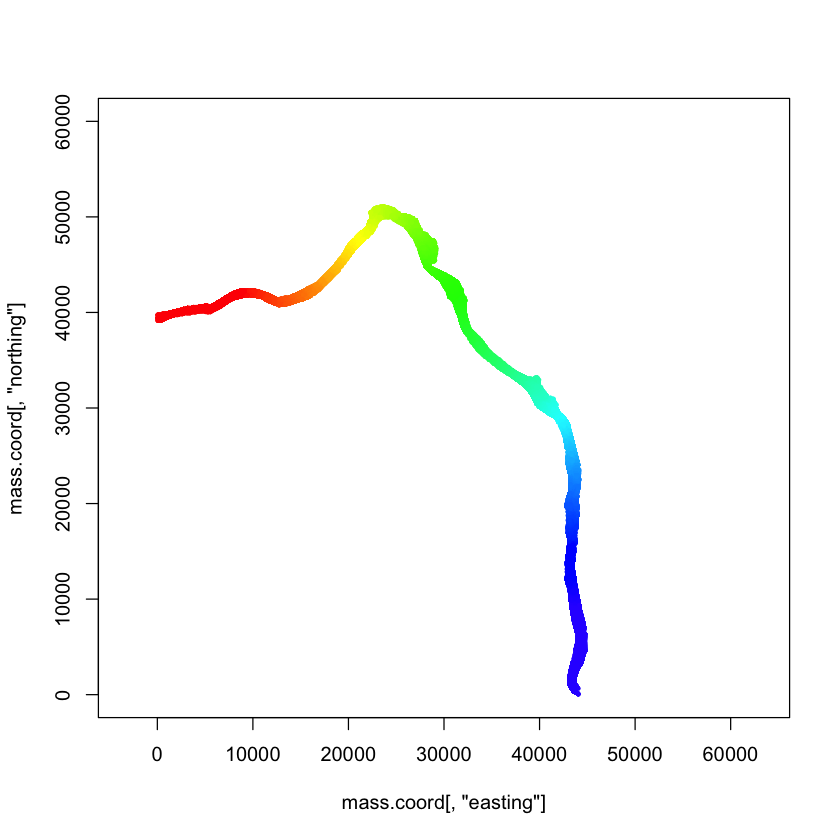

In [25]:
# plot mass1 pts along with river cells
colors = rainbow(nsection,start=0,end=0.7)
names(colors)=as.character(mass.sections)
# jpeg(fname_fig.river.mass1, width=8,height=8,units='in',res=300,quality=100)
plot(mass.coord[,"easting"],
     mass.coord[,"northing"],
     asp=1,cex=0.5,col="white",
     xlim=c(0,60000),
     ylim=c(0,60000)
)
points(river.cells[,"x"],river.cells[,"y"],
       col=colors[as.character(river.section)],
       cex=0.5,pch=16)

dev.copy(jpeg, width=8,height=8,units='in',res=300,quality=100, file = fig.river.mass1)
dev.off()

## write material.h5 file

In [33]:
##------------------------------write hdf5 file-----------------------------------------------##

if(file.exists(fname_material_h5)) {
    file.remove(fname_material_h5)}

cell.ids = as.integer(c(cell.ids))
material.ids = as.integer(c(material.ids))

h5createFile(fname_material_h5)
h5createGroup(fname_material_h5,"Materials")
h5write(cell.ids,fname_material_h5,"Materials/Cell Ids",level=0)
h5write(material.ids,fname_material_h5,"Materials/Material Ids",level=0)

## write river faces to material
h5createGroup(fname_material_h5,"Regions")
for (isection in sort(mass.sections))
{
  river.group = paste("Regions/Mass1_",isection,sep="")
  h5createGroup(fname_material_h5,river.group)
  cells.in.mass = river.cells[which(river.section==isection),
                              c("cell_id")]
  faces.in.mass = river.cells[which(river.section==isection),
                              c("face_id")]
  ## needs to convert floating to integer
  cells.in.mass = as.integer(c(cells.in.mass))
  faces.in.mass = as.integer(c(faces.in.mass))
  h5write(cells.in.mass,fname_material_h5,
          paste(river.group,"/Cell Ids",sep=""),level=0)
  h5write(faces.in.mass,fname_material_h5,
          paste(river.group,"/Face Ids",sep=""),level=0)
}
H5close()

[1] TRUE

[1] TRUE

[1] TRUE

# Generate initial and inland BC head for PFLOTRAN

In [8]:
load(fname_model_inputs.r)

attach(fname_geoFramework.r)

## model parameters


In [9]:
## for grids
grid.x = idx
grid.y = idy
grid.nx = nx
grid.ny = ny
# for domain

pred.grid.south = expand.grid(seq(range_x[1]+grid.x/2,range_x[2],grid.x),range_y[1]+grid.y/2) # for South boundary
pred.grid.north = expand.grid(seq(range_x[1]+grid.x/2,range_x[2],grid.x),range_y[2]-grid.y/2) # for North boundary
pred.grid.west = expand.grid(range_x[1]+grid.x/2,seq(range_y[1]+grid.y/2,range_y[2],grid.y)) # for East boundary
pred.grid.east = expand.grid(range_x[2]-grid.x/2,seq(range_y[1]+grid.y/2,range_y[2],grid.y)) # for West boundary
pred.grid.domain = expand.grid(seq(range_x[1]+grid.x/2,range_x[2],grid.x),
                               seq(range_y[1]+grid.y/2,range_y[2],grid.y)) # for domain
colnames(pred.grid.south)=c('x','y')
colnames(pred.grid.north)=c('x','y')
colnames(pred.grid.east)=c('x','y')
colnames(pred.grid.west)=c('x','y')
colnames(pred.grid.domain)=c('x','y')


In [10]:
## time information
start.time = as.POSIXct("2007-03-28 12:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2015-12-31 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")

dt = 3600  ##secs
times = seq(start.time,end.time,dt)
ntime = length(times)
time.id = seq(0,ntime-1,dt/3600)  ##hourly boundary, why start from 0h?

In [11]:
BC.south = c()
BC.north = c()
BC.east = c()
BC.west = c()
avail.time.id = c()

In [12]:
range.xcoods = c(model_origin[1], model_origin[1] + xlen)
range.ycoods = c(model_origin[2], model_origin[2] + ylen)

## load all well data

In [ ]:
# ##==================== read into well data ====================
mvAwln.id = read.csv(fname_mvAwln_id, stringsAsFactors = F)
mvAwln = read.csv(fname_mvAwln, stringsAsFactors = F)
mvAwln.id = transform(mvAwln.id,Easting = as.numeric(Easting),
                      Northing = as.numeric(Northing))
HEIS_auto_wells = subset(mvAwln, select = c("WellName", "WellNumber", "procWaterElevation", "procDate"))
HEIS_auto_wells = transform(HEIS_auto_wells, WellName = as.character(WellName),
                   WellNumber = as.character(WellNumber),
                   procWaterElevation = as.numeric(procWaterElevation),
                   procDate = as.POSIXct(procDate))

manual_wells_ids = read.csv(fname_manual_wells_ids, stringsAsFactors = F)
manual_wells = read.csv(fname_manual_wells, stringsAsFactors = F)
manual_wells = transform(manual_wells, HYD_DATE_TIME_PST = as.POSIXct(HYD_DATE_TIME_PST))

# HEIS_auto_wells = mvAwln
HEIS_auto_wells_ids = mvAwln.id
HEIS_manual_wells = manual_wells
colnames(HEIS_manual_wells)[1:4] = c("WellNumber", "WellName", "procDate", "procWaterElevation")
HEIS_manual_wells_ids = manual_wells_ids

In [ ]:
USGS_wells = read.csv(fname_USGS_wells, stringsAsFactors = F)
USGS_wells_ids = read.csv(fname_USGS_wells_ids, stringsAsFactors = F)
USGS_wells_ids = transform(USGS_wells_ids, CP_ID_NUM = as.character(CP_ID_NUM))
USGS_wells = transform(USGS_wells, CP_NUM = as.character(CP_NUM), DATE = as.POSIXct(DATE))
USGS_wells$WLELEVft88 = USGS_wells$WLELEVft88*0.3048 # convert ft to meter
USGS_wells_ids$X_SP_83FT = USGS_wells_ids$X_SP_83FT*0.3048
USGS_wells_ids$Y_SP_83FT = USGS_wells_ids$Y_SP_83FT*0.3048
colnames(USGS_wells)[1:4] = c("WellNumber", "procDate", "Year_fract", "procWaterElevation")
colnames(USGS_wells_ids)[2:4] = c("WellNumber", "Easting", "Northing")

## select USGS wells within model domain
USGS_wells_selected.names = USGS_wells_ids$WellNumber[which(USGS_wells_ids$Easting < range.xcoods[2] & USGS_wells_ids$Easting > range.xcoods[1] & 
                                                              USGS_wells_ids$Northing < range.ycoods[2] & USGS_wells_ids$Northing > range.ycoods[1])]
USGS_wells_selected = data.frame(WellNumber = character(), Easting = numeric(), 
                                 Northing = numeric(), DateTime = as.POSIXct(character()), WL = numeric(), stringsAsFactors = F)

for (iwell in USGS_wells_selected.names) {
  
  iwell_data = USGS_wells[which(USGS_wells$WellNumber == iwell), ]
  USGS_wells_selected = rbind(USGS_wells_selected, data.frame(WellNumber = iwell_data$WellNumber, WL = iwell_data$procWaterElevation,
                                                              DateTime = iwell_data$procDate,
                                                              Easting = rep(USGS_wells_ids$Easting[which(USGS_wells_ids$WellNumber == iwell)], length(iwell_data$WellNumber)),
                                                              Northing = rep(USGS_wells_ids$Northing[which(USGS_wells_ids$WellNumber == iwell)], length(iwell_data$WellNumber)),
                                                              stringsAsFactors = F
  ))
  
  
}

In [ ]:
## SFA wells
SFA_wells_ids = read.csv(fname_SFA_wells_ids, stringsAsFactors = F)
colnames(SFA_wells_ids)[2] = c("WellName")
# SFA_wells_list=c("399-1-1_3var.csv")
# iwell = SFA_wells_list

if (!file.exists(fname_SFA_wells_all)) {

SFA_wells = data.frame(WellName = as.character(), DateTime = as.POSIXct(character()),  Temp = numeric(),
                       Spc = numeric(), WL = numeric(), stringsAsFactors = F)
SFA_wells_list = list.files(fname_SFA_wells)
for (iwell in SFA_wells_list) {
  # iwell = "399-1-1_3var.csv"
  iSFA_well = read.csv(paste(fname_SFA_wells, iwell, sep = ""), stringsAsFactors = F)
  # iSFA_well = read.csv(paste(fname_SFA_wells, "399-1-1_3var.csv", sep = ""), stringsAsFactors = F)

   colnames(iSFA_well) = c("DateTime", "Temp", "Spc", "WL")

   if (iwell %in% c("399-5-1_3var.csv", "399-3-19_3var.csv" ) ) {
     iSFA_well$DateTime = as.POSIXct(iSFA_well$DateTime, format = "%m/%d/%y %H:%M", tz = "GMT") ## time formate must agree with data-column

   } else {
   iSFA_well$DateTime = as.POSIXct(iSFA_well$DateTime, format = "%d-%b-%Y %H:%M:%S", tz = "GMT") ## time formate must agree with data-column
   }

  id_col = data.frame(WellName = rep(gsub("_3var.csv", "", iwell), dim(iSFA_well)[1]), stringsAsFactors = F)
  iSFA_well = cbind(id_col, iSFA_well)

  SFA_wells = rbind(SFA_wells, iSFA_well, stringsAsFactors =F)
}

# as.POSIXct(strptime(SFA_wells$DateTime[2], "%d-%b-%Y %H:%M:%S"), format = "%d-%m-%Y %H:%M:%S", tz = "GMT")
# SFA_wells$DateTime = as.POSIXct(SFA_wells$DateTime, format = "%d-%b-%Y %H:%M:%S", tz = "GMT") ## time formate must agree with data-column

write.csv(SFA_wells, file = "/Users/shua784/Dropbox/PNNL/People/Velo/SFA_all_wells.csv", row.names = F)
} else {
  SFA_wells = read.csv(fname_SFA_wells_all, stringsAsFactors = F)
  SFA_wells = transform(SFA_wells, DateTime = as.POSIXct(DateTime))
}

In [ ]:
save(list = c("HEIS_auto_wells", "HEIS_auto_wells_ids", "HEIS_manual_wells", "HEIS_manual_wells_ids",
              "USGS_wells", "USGS_wells_ids", "USGS_wells_selected", "USGS_wells_selected.names","SFA_wells", "SFA_wells_ids"), file = fname_wells.r)

## plot well data

In [ ]:
##-------------------- plot all USGS wells------------------------
if (is.plot) {
  

USGS_wells_selected.names = USGS_wells_ids$WellNumber[which(USGS_wells_ids$Easting < range.xcoods[2] & USGS_wells_ids$Easting > range.xcoods[1] & 
                                                              USGS_wells_ids$Northing < range.ycoods[2] & USGS_wells_ids$Northing > range.ycoods[1])]
USGS_wells_selected = data.frame(WellName = character(), Easting = numeric(), 
                                 Northing = numeric(), DateTime = as.POSIXct(character()), WL = numeric(), stringsAsFactors = F)
start.time = as.POSIXct("1990-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2011-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
jpeg(file="figures/USGS.wells.jpg", width=12, height=16, units="in", res=300)
par(mar =c(4,4,1,1))
plot(0,0,xlim=c(start.time, end.time), ylim = c(100, 305),type = "n", xlab = "Date", ylab = "Water Level (m)",
     axes = F, cex=1.5)
box()
colors = rainbow(100)
for (iwell in USGS_wells_selected.names) {
  
  manual_well = USGS_wells[which(USGS_wells$WellNumber == iwell), ]
  USGS_wells_selected = rbind(USGS_wells_selected, data.frame(WellNumber = manual_well$WellNumber, WL = manual_well$procWaterElevation,
                                                      DateTime = manual_well$procDate,
                                                      Easting = rep(USGS_wells_ids$Easting[which(USGS_wells_ids$WellNumber == iwell)], length(manual_well$WellNumber)),
                                                      Northing = rep(USGS_wells_ids$Northing[which(USGS_wells_ids$WellNumber == iwell)], length(manual_well$WellNumber)),
                                                      stringsAsFactors = F
  ))
  
  lines(manual_well$procDate, manual_well$procWaterElevation, col= sample(colors), lwd = 1 )
  points(manual_well$procDate, manual_well$procWaterElevation, pch=1, cex=1)
  axis.POSIXct(1,at=seq(as.Date("1990-01-01 00:00:00",tz="GMT"),
                        to=as.Date("2011-01-01 00:00:00",tz="GMT"),by="quarter"),
               format="%m/%Y",mgp=c(5,1.7,0),cex.axis=1)
  axis(2,at=seq(100, 305, 5),mgp=c(5,0.7,0),cex.axis=1)
  
}
dev.off()



hist(USGS_wells_selected$DateTime, breaks = 1000, freq = T)

##---------------------- plot all east wells----------------------------
east.wells=c()
pattern = c(glob2rx("15N*"),glob2rx("14N*"), glob2rx("13N*"), glob2rx("12N*"),glob2rx("11N*"), glob2rx("10N*"), glob2rx("09N*"))
east.wells = grep(paste(pattern,collapse = "|"), HEIS_manual_wells_ids$WELL_NAME, value = T)

east.wells.data = data.frame(WellName = character(), Easting = numeric(), 
                            Northing = numeric(), DateTime = as.POSIXct(character()), WL = numeric(), stringsAsFactors = F)

start.time = as.POSIXct("1990-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2008-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
jpeg(file="figures/east.wells.jpg", width=12, height=16, units="in", res=300)
par(mar =c(4,4,1,1))
plot(0,0,xlim=c(start.time, end.time), ylim = c(150, 305),type = "n", xlab = "Date", ylab = "Water Level (m)",
     axes = F, cex=1.5)
box()
colors = rainbow(100)
for (iwell in east.wells) {
  
  manual_well = HEIS_manual_wells[which(HEIS_manual_wells$WellName == iwell), ]
  east.wells.data = rbind(east.wells.data, data.frame(WellName = manual_well$WellName, WL = manual_well$procWaterElevation,
                                                    DateTime = manual_well$procDate,
                                                    Easting = rep(HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)], length(manual_well$WellName)),
                                                    Northing = rep(HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)], length(manual_well$WellName)),
                                                    stringsAsFactors = F
  ))
  
  lines(manual_well$procDate, manual_well$procWaterElevation, col= sample(colors), lwd = 1 )
  points(manual_well$procDate, manual_well$procWaterElevation, pch=1, cex=1)
  axis.POSIXct(1,at=seq(as.Date("1990-01-01 00:00:00",tz="GMT"),
                        to=as.Date("2008-01-01 00:00:00",tz="GMT"),by="quarter"),
               format="%m/%Y",mgp=c(5,1.7,0),cex.axis=1)
  axis(2,at=seq(150, 305, 5),mgp=c(5,0.7,0),cex.axis=1)
  
  # date.range = range(manual_well$procDate)
  # 
  # print(paste(iwell, "has", length(manual_well$procWaterElevation), "obs. points"))
}
dev.off()

hist(east.wells.data$DateTime, breaks = 1000, freq = T)

##---------------------- plot all HEIS manual wells--------------------


start.time = as.POSIXct("1990-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2017-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
jpeg(file="figures/all.manual.wells.jpg", width=12, height=16, units="in", res=300)
par(mar =c(4,4,1,1))
plot(0,0,xlim=c(start.time, end.time), ylim = c(100, 305),type = "n", xlab = "Date", ylab = "Water Level (m)",
     axes = F, cex=1.5)
box()
colors = rainbow(100)
for (iwell in well_names) {
  
  manual_well = HEIS_manual_wells[which(HEIS_manual_wells$WellName == iwell), ]
  
  lines(manual_well$procDate, manual_well$procWaterElevation, col= sample(colors), lwd = 1 )
  points(manual_well$procDate, manual_well$procWaterElevation, pch=1, cex=1)
  axis.POSIXct(1,at=seq(as.Date("1990-01-01 00:00:00",tz="GMT"),
                        to=as.Date("2017-01-01 00:00:00",tz="GMT"),by="quarter"),
               format="%m/%Y",mgp=c(5,1.7,0),cex.axis=1)
  axis(2,at=seq(150, 305, 5),mgp=c(5,0.7,0),cex.axis=1)
  
}
dev.off()

hist.HEIS = hist(HEIS_manual_wells$procDate, breaks = 1000, freq = T)

}

## Select well data within timeframe 

In [71]:
attach(fname_wells.r)
ls(pos = 2)

[1] "HEIS_auto_wells"           "HEIS_auto_wells_ids"      
 [3] "HEIS_manual_wells"         "HEIS_manual_wells_ids"    
 [5] "SFA_wells"                 "SFA_wells_ids"            
 [7] "USGS_wells"                "USGS_wells_ids"           
 [9] "USGS_wells_selected"       "USGS_wells_selected.names"

In [113]:
initial.time = as.POSIXct("2007-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
# initial.time = as.POSIXct("2007-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")

In [114]:
well_names = c(unique(HEIS_manual_wells_ids$WELL_NAME), unique(USGS_wells_selected.names), unique(SFA_wells_ids$WellName))

well_names = unique(well_names)
# well_names = c(unique(SFA_wells_ids$WellName)[27:48])

# time_mar = 1*24*3600 #1 day range
# time_mar = 15*86400 #15 day range
time_mar = 90*86400 #90 day range

# times=times[1]
times = initial.time
# itime = times

In [118]:
itime = initial.time

print(itime)
selected.wells = data.frame(WellName = character(),  WellNumber = character(),
                      Easting = numeric(), 
                      Northing = numeric(), DateTime = as.POSIXct(character()), WL = numeric(), stringsAsFactors = F)

for (iwell in well_names) {

    if (iwell %in% SFA_wells$WellName) {
    #           print(paste(iwell, "(SFA)"))
      manual_well = SFA_wells[which(SFA_wells$WellName == iwell), ]
      index = which.min(abs(as.numeric(manual_well$DateTime - itime)))
      DateTime = manual_well$DateTime[index]

          if (DateTime == itime) {
            WL = manual_well$WL[index]
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellName[index],
                                                              WellNumber = manual_well$WellName[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = SFA_wells_ids$Easting[which(SFA_wells_ids$WellName == iwell)],
                                                              Northing = SFA_wells_ids$Northing[which(SFA_wells_ids$WellName == iwell)],
                                                              stringsAsFactors = F
            ))
          } else if (DateTime < itime + time_mar & DateTime > itime - time_mar) {
            print(paste(iwell,"has wl within", time_mar, "seconds of itime (SFA well)"))
            WLs = manual_well$WL[which(manual_well$DateTime <itime + time_mar & manual_well$DateTime > itime - time_mar)]
            WL = median(WLs)
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellName[index],
                                                              WellNumber = manual_well$WellName[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = SFA_wells_ids$Easting[which(SFA_wells_ids$WellName == iwell)],
                                                              Northing = SFA_wells_ids$Northing[which(SFA_wells_ids$WellName == iwell)],
                                                              stringsAsFactors = F
            ))
          }
    } else if (iwell %in% HEIS_auto_wells$WellName) {
      # print(paste(iwell, "(mvAwln)"))
      auto_well = HEIS_auto_wells[which(HEIS_auto_wells$WellName == iwell), ]
      index = which.min(abs(as.numeric(auto_well$procDate - itime)))
      DateTime = auto_well$procDate[index]

          ## find wells having data within given time range
          if (DateTime == itime) {
            WL = auto_well$procWaterElevation[index]
            selected.wells = rbind(selected.wells, data.frame(WellName = auto_well$WellName[index],
                                                              WellNumber = auto_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              Northing = HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              stringsAsFactors = F
            ))
          } else if (DateTime < itime + time_mar & DateTime > itime - time_mar) {
            print(paste(iwell,"has wl within", time_mar, "seconds of itime (mvAwln well)"))
            WLs = auto_well$procWaterElevation[which(auto_well$procDate <itime + time_mar & auto_well$procDate > itime - time_mar)]
            WL = median(WLs)
            selected.wells = rbind(selected.wells, data.frame(WellName = auto_well$WellName[index],
                                                              WellNumber = auto_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              Northing = HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              stringsAsFactors = F
            ))
            }

    } else if (iwell %in% HEIS_manual_wells$WellName) {
      # print(paste(iwell, "(HEIS manual)"))
      manual_well = HEIS_manual_wells[which(HEIS_manual_wells$WellName == iwell), ]
      index = which.min(abs(as.numeric(manual_well$procDate - itime)))
      DateTime = manual_well$procDate[index]

          if (DateTime == itime) {
            WL = manual_well$procWaterElevation[index]
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellName[index],
                                                              WellNumber = manual_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              Northing = HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              stringsAsFactors = F
            ))
          } else if (DateTime < itime + time_mar & DateTime > itime - time_mar) {
            print(paste(iwell,"has wl within", time_mar, "seconds of itime (manual well)"))
            WLs = manual_well$procWaterElevation[which(manual_well$procDate <itime + time_mar & manual_well$procDate > itime - time_mar)]
            WL = median(WLs)
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellName[index],
                                                              WellNumber = manual_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              Northing = HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              stringsAsFactors = F
            ))
          }
    } else if (iwell %in% USGS_wells_selected$WellNumber) {
      # print(paste(iwell, "(USGS)"))
      manual_well = USGS_wells_selected[which(USGS_wells_selected$WellNumber == iwell), ]
      index = which.min(abs(as.numeric(manual_well$DateTime - itime)))
      DateTime = manual_well$DateTime[index]

          if (DateTime == itime) {
            WL = manual_well$WL[index]
            selected.wells = rbind(selected.wells, data.frame(WellName = sprintf("CP%06s", manual_well$WellNumber[index]),
                                                              WellNumber = manual_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = USGS_wells_selected$Easting[index],
                                                              Northing = USGS_wells_selected$Northing[index],
                                                              stringsAsFactors = F
            ))
          } else if (DateTime < itime + time_mar & DateTime > itime - time_mar) {
            print(paste(iwell,"has wl within ", time_mar, "seconds of itime (USGS well)"))
            WLs = manual_well$WL[which(manual_well$DateTime <itime + time_mar & manual_well$DateTime > itime - time_mar)]
            WL = median(WLs)
            selected.wells = rbind(selected.wells, data.frame(WellName = sprintf("CP%06s", manual_well$WellNumber[index]),
                                                              WellNumber = manual_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = USGS_wells_selected$Easting[index],
                                                              Northing = USGS_wells_selected$Northing[index],
                                                              stringsAsFactors = F
            ))
          }
        } else {
        print(paste("no well data availabe for ", iwell))
    }
    ## sample wells from SFA data

} 

[1] "2007-01-01 GMT"
[1] "199-B2-13 has wl within 7776000 seconds of itime (manual well)"
[1] "199-B3-1 has wl within 7776000 seconds of itime (manual well)"
[1] "199-B4-1 has wl within 7776000 seconds of itime (manual well)"
[1] "199-B4-4 has wl within 7776000 seconds of itime (manual well)"
[1] "199-B5-2 has wl within 7776000 seconds of itime (manual well)"
[1] "199-D2-6 has wl within 7776000 seconds of itime (manual well)"
[1] "199-D5-15 has wl within 7776000 seconds of itime (manual well)"
[1] "199-D5-16 has wl within 7776000 seconds of itime (manual well)"
[1] "199-D5-18 has wl within 7776000 seconds of itime (manual well)"
[1] "199-D8-4 has wl within 7776000 seconds of itime (manual well)"
[1] "199-F1-2 has wl within 7776000 seconds of itime (manual well)"
[1] "199-F5-1 has wl within 7776000 seconds of itime (manual well)"
[1] "199-F5-4 has wl within 7776000 seconds of itime (manual well)"
[1] "199-F5-42 has wl within 7776000 seconds of itime (manual well)"
[1] "199-F5-46 has wl 

In [121]:
write.csv(selected.wells, file = fname_selected_wells_csv, row.names = FALSE)

## interpolation

### interpolate for initial head

In [22]:
selected.wells = read.csv(fname_selected_wells_csv)

In [122]:
selected.wells.unique = selected.wells[!duplicated(selected.wells$WellName), ] # remove duplicated wellNames
selected.wells.unique = selected.wells[!duplicated(selected.wells[c("Easting", "Northing")]), ] # remove duplicated well coords
selected.wells.unique = selected.wells.unique[complete.cases(selected.wells.unique), ] # remove rows contain NAs

In [123]:
write.csv(selected.wells.unique, file = fname_selected_wells_unique_csv, row.names = FALSE)

**use inverse distance interpolation**

In [13]:
selected.wells.unique = read.csv(fname_selected_wells_unique_csv)

In [20]:
# expand points to grid
grd = expand.grid(unit_x, unit_y)

In [34]:
# save(grd, file = "results/model_grids.r")

idw.interp = idw(values=selected.wells.unique[,"WL"],
                 coords = selected.wells.unique[,c("Easting","Northing")],
                 grid=grd,
                 method="shepard",
                 p=2)
idw.interp = as.numeric(unlist(idw.interp))

h.initial = array(idw.interp, c(nx, ny))

quartz_off_screen 
                3

pdf 
  2

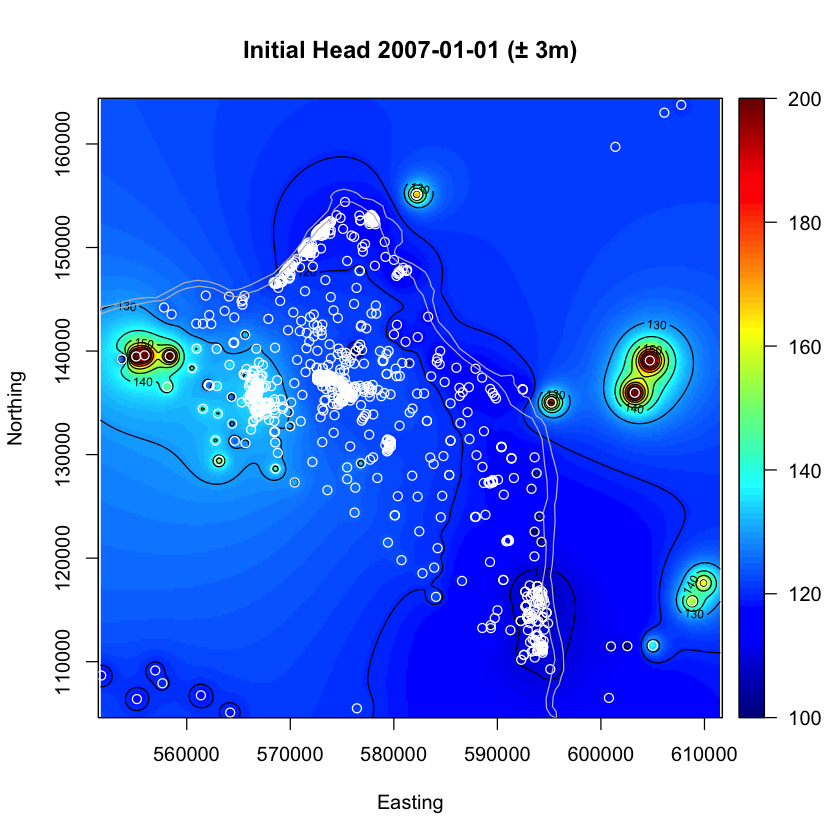

In [11]:
itime = as.POSIXct("2007-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
river.geometry = read.csv(fname_river.geo)
# fname = paste(fig_initial_H, 'initial_head_1000m_010107_3m.jpg', sep = "")
# jpeg(fname, width=8,height=8,units='in',res=300,quality=100)

head4plot = h.initial
head4plot[head4plot>200]=200
image2D(z= head4plot, x= unit_x, y= unit_y, shade=0, rasterImage = T, NAcol = "white",
        main = paste("Initial Head", itime, "(\u00B1", "3m)"), asp = 1, contour = T, zlim = c(100, 200), xlab = "Easting", ylab = "Northing")
points(selected.wells.unique$Easting, selected.wells.unique$Northing, col = "white", pch = 1, asp=1)
polygon(river.geometry$x, river.geometry$y, border = "gray", asp=1)

dev.copy(jpeg, fig_initial_H, width = 8, height = 8, units= "in", res = 300)
dev.off()

### interpolate for BC head

In [14]:
## add constant head to inland bc
  grd.east = data.frame(x = pred.grid.east$x + model_origin[1], y = pred.grid.east$y + model_origin[2])
  grd.west = data.frame(x = pred.grid.west$x + model_origin[1], y = pred.grid.west$y + model_origin[2])
  grd.north = data.frame(x = pred.grid.north$x + model_origin[1], y = pred.grid.north$y + model_origin[2])
  grd.south = data.frame(x = pred.grid.south$x + model_origin[1], y = pred.grid.south$y + model_origin[2])

In [15]:
idw.interp.east = idw(values=selected.wells.unique[,"WL"],
                    coords = selected.wells.unique[,c("Easting","Northing")],
                   grid=grd.east,
                   method="shepard",
                   p=2)
  idw.interp.east = as.numeric(unlist(idw.interp.east))
  BC.east = array(idw.interp.east, c(1, ny))
  
  idw.interp.west = idw(values=selected.wells.unique[,"WL"],
                 coords = selected.wells.unique[,c("Easting","Northing")],
                        grid=grd.west,
                        method="shepard",
                        p=2)
  idw.interp.west = as.numeric(unlist(idw.interp.west))
  BC.west = array(idw.interp.west, c(1, ny))
  
  idw.interp.north = idw(values=selected.wells.unique[,"WL"],
                 coords = selected.wells.unique[,c("Easting","Northing")],
                        grid=grd.north,
                        method="shepard",
                        p=2)
  idw.interp.north = as.numeric(unlist(idw.interp.north))
  BC.north = array(idw.interp.north, c(1, ny))
  
  idw.interp.south = idw(values=selected.wells.unique[,"WL"],
                 coords = selected.wells.unique[,c("Easting","Northing")],
                        grid=grd.south,
                        method="shepard",
                        p=2)
  idw.interp.south = as.numeric(unlist(idw.interp.south))
  BC.south = array(idw.interp.south, c(1, ny))

## generate smoothed initial head using Mass1 water level

In [16]:
# get coord along east, west, north and south boundary
bc.df = grd.east
bc.df["z"] = idw.interp.east

idf = grd.west
idf["z"] = idw.interp.west
bc.df = rbind(bc.df, idf)

idf = grd.north
idf["z"] = idw.interp.north
bc.df = rbind(bc.df, idf)

idf = grd.south
idf["z"] = idw.interp.south
bc.df = rbind(bc.df, idf)

In [ ]:
bc.df = bc.df[c(TRUE, FALSE), ] # select odd rows only to avoid memory issue

In [ ]:
mass.info = read.csv(fname_mass.info)
mass.info.sub = subset(mass.info, select= c(easting, northing, max_wl))
names(mass.info.sub) = c("x", "y", "z")

bc.df = rbind(bc.df, mass.info.sub)

bc.df = bc.df[!duplicated(bc.df), ]

idw.interp = idw(values = bc.df[,"z"],
               coords = bc.df[,c("x","y")],
               grid=grd,
               method="shepard",
               p=2)
idw.interp = as.numeric(unlist(idw.interp))

h.initial.smooth = array(idw.interp, c(nx, ny))

quartz_off_screen 
                3

pdf 
  2

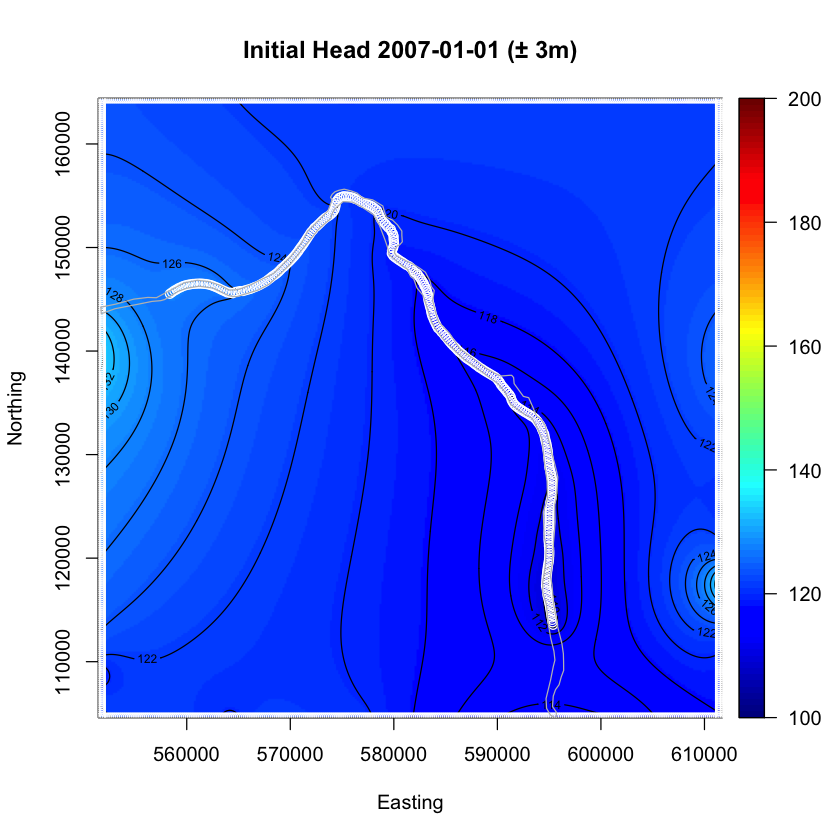

In [17]:
# jpeg("figures/h_initial_smooth_040107.jpg", width=8,height=8,units='in',res=300,quality=100)

head4plot = h.initial.smooth
head4plot[head4plot>200]=200
image2D(z= head4plot, x= unit_x, y= unit_y, shade=0, rasterImage = T, NAcol = "grey",
      main = paste("Initial Head", itime, "(\u00B1", "3m)"), asp = 1, contour = T, zlim = c(100, 200), xlab = "Easting", ylab = "Northing")
points(bc.df$x, bc.df$y, col = "white", pch = 1, asp=1)
polygon(river.geometry$x, river.geometry$y, border = "gray", asp=1)

# fname = paste(fig_initial_H, "initial_head_200m_040107s", sep = "")
dev.copy(jpeg, fig_initial_H,  width=8,height=8,units='in',res=300,quality=100)
dev.off()

## generate H5 output

### initial_h5

In [18]:
##Generate the initial condition hdf5 file for the domain.
h.initial = h.initial.smooth

if (file.exists(fname_initial.h5)) {
    file.remove(fname_initial.h5)
}
h5createFile(fname_initial.h5)
h5createGroup(fname_initial.h5,'Initial_Head')

h5write(t(h.initial),fname_initial.h5, ## why tranpose? to match HDF5 format
        'Initial_Head/Data',level=0)
fid = H5Fopen(fname_initial.h5)
h5g = H5Gopen(fid,'/Initial_Head')
h5writeAttribute(attr = 1.0, h5obj = h5g, name = 'Cell Centered')
h5writeAttribute.character(attr = "XY", h5obj = h5g, name = 'Dimension')
h5writeAttribute(attr = c(idx, idy), h5obj = h5g, name = 'Discretization')
h5writeAttribute(attr = 500.0, h5obj = h5g, name = 'Max Buffer Size')
h5writeAttribute(attr = c(0, 0), h5obj = h5g, name = 'Origin') 
H5Gclose(h5g)
H5Fclose(fid)

[1] TRUE

[1] TRUE

### BC_h5

In [19]:
##=================Generate the BC hdf5 file===========================.

# time.id = as.integer(time.id) 
time.id = as.integer(0) 

if (file.exists(fname.BC.h5)) {
    file.remove(fname.BC.h5)
}

h5createFile(fname.BC.h5)

### write data
h5createGroup(fname.BC.h5,'BC_South')
h5write(time.id, fname.BC.h5,'BC_South/Times',level=0)
h5write(BC.south, fname.BC.h5,'BC_South/Data',level=0)

h5createGroup(fname.BC.h5,'BC_North')
h5write(time.id,fname.BC.h5,'BC_North/Times',level=0)
h5write(BC.north,fname.BC.h5,'BC_North/Data',level=0)

h5createGroup(fname.BC.h5,'BC_East')
h5write(time.id,fname.BC.h5,'BC_East/Times',level=0)
h5write(BC.east,fname.BC.h5,'BC_East/Data',level=0)

h5createGroup(fname.BC.h5,'BC_West')
h5write(time.id,fname.BC.h5,'BC_West/Times',level=0)
h5write(BC.west,fname.BC.h5,'BC_West/Data',level=0)

### write attribute
fid = H5Fopen(fname.BC.h5)
h5g.south = H5Gopen(fid,'/BC_South')
h5g.north = H5Gopen(fid,'/BC_North')
h5g.east = H5Gopen(fid,'/BC_East')
h5g.west = H5Gopen(fid,'/BC_West')


h5writeAttribute(attr = 1.0, h5obj = h5g.south, name = 'Cell Centered')
h5writeAttribute(attr = 'X', h5obj = h5g.south, name = 'Dimension')
h5writeAttribute(attr = grid.x, h5obj = h5g.south, name = 'Discretization')
h5writeAttribute(attr = 200.0, h5obj = h5g.south, name = 'Max Buffer Size')
h5writeAttribute(attr = range_x[1], h5obj = h5g.south, name = 'Origin')
h5writeAttribute(attr = 'h', h5obj = h5g.south, name = 'Time Units')
h5writeAttribute(attr = 1.0, h5obj = h5g.south, name = 'Transient')


h5writeAttribute(attr = 1.0, h5obj = h5g.north, name = 'Cell Centered')
h5writeAttribute(attr = 'X', h5obj = h5g.north, name = 'Dimension')
h5writeAttribute(attr = grid.x, h5obj = h5g.north, name = 'Discretization')
h5writeAttribute(attr = 200.0, h5obj = h5g.north, name = 'Max Buffer Size')
h5writeAttribute(attr = range_x[1], h5obj = h5g.north, name = 'Origin')
h5writeAttribute(attr = 'h', h5obj = h5g.north, name = 'Time Units')
h5writeAttribute(attr = 1.0, h5obj = h5g.north, name = 'Transient')


h5writeAttribute(attr = 1.0, h5obj = h5g.east, name = 'Cell Centered')
h5writeAttribute(attr = 'Y', h5obj = h5g.east, name = 'Dimension')
h5writeAttribute(attr = grid.y, h5obj = h5g.east, name = 'Discretization')
h5writeAttribute(attr = 200.0, h5obj = h5g.east, name = 'Max Buffer Size')
h5writeAttribute(attr = range_y[1], h5obj = h5g.east, name = 'Origin')
h5writeAttribute(attr = 'h', h5obj = h5g.east, name = 'Time Units')
h5writeAttribute(attr = 1.0, h5obj = h5g.east, name = 'Transient')


h5writeAttribute(attr = 1.0, h5obj = h5g.west, name = 'Cell Centered')
h5writeAttribute(attr = 'Y', h5obj = h5g.west, name = 'Dimension')
h5writeAttribute(attr = grid.y, h5obj = h5g.west, name = 'Discretization')
h5writeAttribute(attr = 200.0, h5obj = h5g.west, name = 'Max Buffer Size')
h5writeAttribute(attr = range_y[1], h5obj = h5g.west, name = 'Origin')
h5writeAttribute(attr = 'h', h5obj = h5g.west, name = 'Time Units')
h5writeAttribute(attr = 1.0, h5obj = h5g.west, name = 'Transient')


H5Gclose(h5g.south)
H5Gclose(h5g.north)
H5Gclose(h5g.east)
H5Gclose(h5g.west)
H5Fclose(fid)


[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

# Generate river boundary from Mass1 simulation

In [1]:
setwd("/Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model/")
paste("Working dir: ", getwd())

[1] "Working dir:  /Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model"

In [2]:
imodel=c("200x200x5")
# mass1 data
fname_mass1_coord = "data/MASS1/coordinates.csv"
fname_mass1_pts = "data/MASS1/transient_1976_2016/"

fname_mass1_xts = "results/mass.data.xts.r"
fname_mass1_data.r = "results/mass.data.r"
fname_model_inputs.r = paste("results/model_inputs_", imodel, ".r", sep = "")

is.smooth = T

fname_DatumH = "Inputs/river_bc/bc_1w_smooth/DatumH_Mass1_"
fname_Gradients = "Inputs/river_bc/bc_1w_smooth/Gradients_Mass1_"

In [3]:
load(fname_model_inputs.r)

In [4]:
start.time = as.POSIXct("2007-03-28 12:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
#start.time = as.POSIXct("2007-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2016-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")

mass.coord = read.csv(fname_mass1_coord)
mass.coord[,"easting"] = mass.coord[,"easting"]-model_origin[1]
mass.coord[,"northing"] = mass.coord[,"northing"]-model_origin[2]

In [5]:
##------------------------- compile all the mass1 data --------------------------
if (!file.exists(fname_mass1_xts)) {
  
  slice.list = as.character(mass.coord[,1])
  
mass.data = list()
for (islice in slice.list) {
  print(islice)
  mass.data[[islice]] = read.csv(paste(fname_mass1_pts,"mass1_",
                                       islice,".csv",sep=""))
}
names(mass.data) = slice.list

for (islice in slice.list) {
  print(islice)
  mass.data[[islice]][["date"]] =
    as.POSIXct(mass.data[[islice]][["date"]],format="%Y-%m-%d %H:%M:%S",tz='GMT')
  mass.data[[islice]][["stage"]] = mass.data[[islice]][["stage"]]+1.039
}


# save(mass.data, file=fname_mass1_data.r)

time.index = seq(from=start.time,to=end.time,by="1 hour")
ntime = length(time.index)
simu.time = c(1:ntime-1)*3600

mass.data.xts = list()
for (islice in slice.list)
{
  print(islice)
  mass.data.xts[[islice]] = xts(mass.data[[islice]],
                                order.by=mass.data[[islice]][["date"]] ,unique=T,tz="GMT")
  
  mass.data.xts[[islice]] = mass.data.xts[[islice]][
    .indexmin(mass.data.xts[[islice]][,"date"]) %in% c(56:59,0:5)]

  index(mass.data.xts[[islice]]) = round(index(mass.data.xts[[islice]]),units="hours")
  mass.data.xts[[islice]] = mass.data.xts[[islice]][
    !duplicated(.index(mass.data.xts[[islice]]))]
  mass.data.xts[[islice]] = merge(mass.data.xts[[islice]],time.index)
  
}

save(mass.data.xts,file=paste(results.dir,"mass.data.xts.r",sep=""))
} else {
    
  load(fname_mass1_xts)
  print("mass1_xts loaded.")
}

In [ ]:
##------------------------- generate river bc-----------------------------------
slice.list = names(mass.data.xts)
# slice.list = c("40", "41")
# islice = slice.list
nslice = length(slice.list)


for (islice in slice.list)
{
    mass.data.xts[[islice]] = mass.data.xts[[islice]][index(mass.data.xts[[islice]])>=start.time,]
    mass.data.xts[[islice]] = mass.data.xts[[islice]][index(mass.data.xts[[islice]])<=end.time,]    
}


time.index = seq(from=start.time,to=end.time,by="1 hour")
ntime = length(time.index)
simu.time = c(1:ntime-1)*3600
mass.gradient = rep(NA,ntime)

# slice.list = as.character(seq(314,330))
# nslice = length(slice.list)

# coord.data = read.table(fname_model_coord)
# rownames(coord.data) = coord.data[,1]
# coord.data =  coord.data[rownames(coord.data) %in% slice.list,]
# nwell = dim(coord.data)[1]
# y = coord.data[slice.list,3]
# names(y)=rownames(coord.data)
# x = coord.data[slice.list,2]
# names(x)=rownames(coord.data)

mass.level = array(NA,c(nslice,ntime))
rownames(mass.level) = slice.list
for (islice in slice.list) {
    mass.level[islice,] = mass.data.xts[[islice]][,"stage"]
}
available.date = which(colSums(mass.level,na.rm=TRUE)>200)

In [ ]:
#-----------------------------smooth river stage-------------------------------##
if (is.smooth) {
  

# nwindows = 6 #hour
# nwindows = 24*1 #1d
nwindows = 24*7 #1 week
dt = 3600
filt = Ma(rep(1/nwindows,nwindows))
# new.mass.level = array(NA,c(nslice,(ntime+1)))
new.mass.level = array(NA,c(nslice,ntime+1)) #moving average (ma) add 1 extra time to match the dim(ma_value)
for (islice in 1:nslice)
{
    print(islice)
    ori_time = simu.time
    ori_value = mass.level[islice,]

    ma_value = filter(filt,ori_value)
    ma_time = ori_time-dt*(nwindows-1)/2 # ma_time offset by dt/2
    ma_value = tail(ma_value,-nwindows)
    ma_time = tail(ma_time,-nwindows)
    ma_value = c(ori_value[ori_time<min(ma_time)],ma_value)
    ma_time = c(ori_time[ori_time<min(ma_time)],ma_time)
    ma_value = c(ma_value,ori_value[ori_time>max(ma_time)])
    ma_time = c(ma_time,ori_time[ori_time>max(ma_time)])

    new.mass.level[islice,] = ma_value
}

##generate moving aveage plots with original mass data
# for (islice in 1:nslice) {
  islice = 1
  jpeg(paste("figures/mass_original_vs_mvAve_", slice.list[islice], "_",nwindows,"h.jpg", sep=''),width=8,height=5,units='in', res = 300)

  ori_time = ori_time + start.time
  plot(ori_time, mass.level[islice, 1:length(ori_time)] ,type = "l", col= "black", axes = F, xlab=NA,ylab="Hydaulic head (m)")
  box()

  axis(2,at=seq(118,128,2),mgp=c(5,0.7,0),cex.axis=1)

  axis.POSIXct(1,at=seq(as.Date("2007-01-01",tz="GMT"),
                        to=as.Date("2016-01-01",tz="GMT"),by="quarter"),format="%m/%Y",mgp=c(5,0.7,0))
  ma_time = ma_time + start.time
  lines(ma_time, new.mass.level[islice,], col= "red")


  legend("topright",legend = c("original","mvAve"), col = c("black", "red"), lty = c("solid", "solid"), bty = "n")
  title(paste("mass_original_vs_ma_", slice.list[islice], sep=''))
  dev.off()
# }




mass.level = new.mass.level
simu.time = ma_time
ntime = length(simu.time)

}

In [ ]:
##------------------------calculate gradient--------------------------------##
# mass.gradient = array(NA,c(nslice,(ntime+1)))
mass.gradient.x = array(NA,c(nslice,ntime))
mass.gradient.y = array(NA,c(nslice,ntime))
rownames(mass.gradient.y) = slice.list
rownames(mass.gradient.x) = slice.list

for (islice in 1:(nslice-1)) #from top to bottom. 
{
  distance = sqrt((mass.coord[islice+1,
                              "northing"]-mass.coord[islice,"northing"])^2 +
                    (mass.coord[islice+1,"easting"]-mass.coord[islice,"easting"])^2)
  ## calculate grad based on x-direction
  mass.gradient.x[islice,] = (mass.level[islice+1,]-mass.level[islice,]
  )/distance*(mass.coord[islice+1,"easting"]-mass.coord[islice,"easting"])/distance   
  
  ## calculate grad based on y-direction    
  mass.gradient.y[islice,] = (mass.level[islice+1,]-mass.level[islice,]
  )/distance*(mass.coord[islice+1,"northing"]-mass.coord[islice,"northing"])/distance 
}


In [ ]:
# gradient_314 is calcuated based on 315 and 314
for (islice in 1:(nslice-1))
{ 
    print(islice)
    Gradients = cbind(simu.time,
                      mass.gradient.x[islice,],
                      mass.gradient.y[islice,],
                      rep(0,(ntime)))
    
    DatumH = cbind(simu.time,
                   rep(mass.coord[islice,"easting"],ntime),
                   rep(mass.coord[islice,"northing"],ntime),                                      
                   mass.level[islice,])

    write.table(DatumH, file=paste(fname_DatumH, slice.list[islice],'.txt',sep=""),col.names=FALSE,row.names=FALSE) 
    write.table(Gradients, file=paste(fname_Gradients, slice.list[islice],".txt",sep=''),col.names=FALSE,row.names=FALSE)
    
    
}
